In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.formula.api import ols

Model disp.hp.wt.qsec: AIC = 157.06960941462438
Model disp.qsec: AIC = 169.84184864154588
Model disp.wt: AIC = 162.16778425461416
Model disp.hp.wt.qsec: BIC = 164.398288928623
Model disp.qsec: BIC = 174.23905634994506
Model disp.wt: BIC = 166.56499196301334


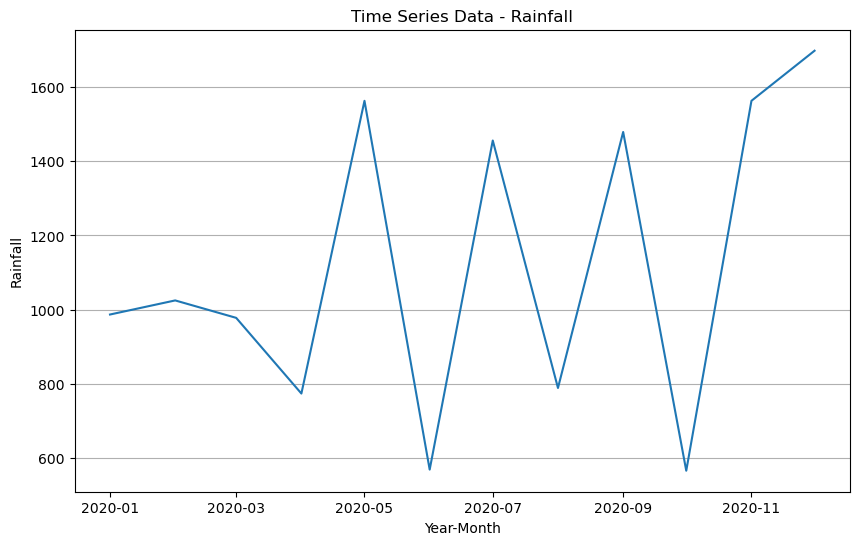

In [15]:
# Download mtcars
url_mtcars = "https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/mtcars.csv"
mtcars = pd.read_csv(url_mtcars)

# --- AIC Model Selection (Linear Regression) ---
models = {
    'disp.hp.wt.qsec': ols("mpg ~ disp + hp + wt + qsec", mtcars).fit(),
    'disp.qsec': ols("mpg ~ disp + qsec", mtcars).fit(),
    'disp.wt': ols("mpg ~ disp + wt", mtcars).fit()
}

for name, model in models.items():
    print(f"Model {name}: AIC = {model.aic}")


# --- BIC Model Selection (Linear Regression) ---
for name, model in models.items():
    print(f"Model {name}: BIC = {model.bic}")


# --- ARIMA Model (Rainfall Data) ---
rain = [987, 1025, 978, 774, 1563, 569, 1456, 789, 1479, 566, 1563, 1698]
rain_ts = pd.Series(rain, index=pd.date_range('2020-01', periods=12, freq='MS'))

plt.figure(figsize=(10, 6))
plt.plot(rain_ts)
plt.title('Time Series Data - Rainfall')
plt.xlabel('Year-Month')
plt.ylabel('Rainfall')
plt.grid(axis='y')
plt.show()

In [16]:
model1 = ARIMA(rain_ts, order=(1, 0, 0)).fit()
model2 = ARIMA(rain_ts, order=(2, 0, 0)).fit()

print(f"Model 1 BIC: {model1.bic}")
print(f"Model 2 BIC: {model2.bic}")

Model 1 BIC: 180.85989479100397
Model 2 BIC: 183.17332444415808


# ARIMA Model (AirPassengers Data)

ADF Statistic: 0.8153688792060547
p-value: 0.9918802434376411
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Tue, 09 Jul 2024   AIC                           1365.825
Time:                        21:45:56   BIC                           1389.528
Sample:                    01-01-1949   HQIC                          1375.457
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272   

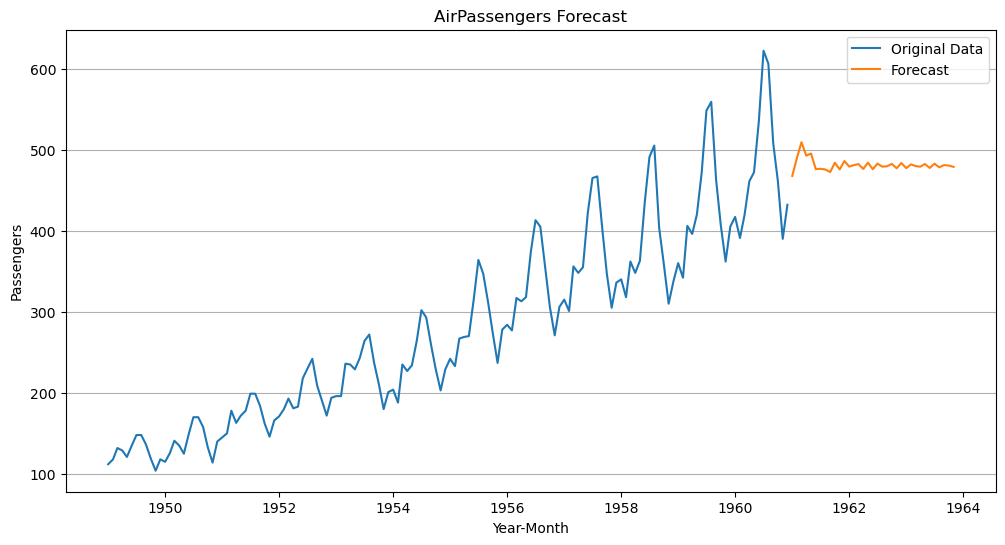

In [17]:
airpassengers = pd.read_csv("AirPassengers.csv", index_col='Month', parse_dates=True) 
airpassengers.index.freq = 'MS'

# Check for stationarity 
result = adfuller(airpassengers['Passengers'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Fit the ARIMA model
mymodel = auto_arima(airpassengers)
print(mymodel.summary())

# Ljung-Box test for residuals
ljung_box_results = acorr_ljungbox(mymodel.resid(), lags=[5, 10, 15])
print("Ljung-Box test results:")
print(ljung_box_results)

# Forecast (adjust forecast horizon as needed)
forecast = mymodel.predict(n_periods=36)
forecast = pd.Series(forecast, index=pd.date_range(airpassengers.index[-1], periods=36, freq='MS'))

# Plot original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(airpassengers, label='Original Data')
plt.plot(forecast, label='Forecast')
plt.title('AirPassengers Forecast')
plt.xlabel('Year-Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(axis='y')
plt.show()